In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("matches.csv")

In [4]:
df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [5]:
data = df[['team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]
data = data.dropna()

In [6]:
le = LabelEncoder()

for col in data.columns:
    data[col] = le.fit_transform(data[col])

In [7]:
X = data.drop('winner', axis=1)
y = data['winner']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [9]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [10]:
y_pred = model.predict(X_test)

In [11]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.21100917431192662
[[22  0  0  0  0  0  2  0  3  0 10  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0  0  0  0  4  0  0  0  0  0  0  0]
 [ 7  0  0  0  0  0  3  0  2  0  1  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  1  0  1  0  2  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  1  0  3  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  1  0  9  0  0  1  0  1  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0  0  1  0  9  0  0  1  0  5  0  2]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  0  0  1  0  0]
 [ 8  0  0  0  0  0  1  0  2  0  5  0  0  2  0  5  0  3]
 [ 0  0  0  0  0  0  0  0  0  0  2  0  0  1  0  0  0  0]
 [ 1  0  0  0  0  0  0  0  0  0  2  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  2  0  9  0  0  4  0  3  0  5]
 [ 0  0  0  0  0  0  0  0  1  0  1  0  0  0  0  1  0  1]
 [ 0  0  0  0  0  0  0  0  2  0  4  0  0  1  0  8  0 11]
 [ 0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  1]
 

C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capi

In [12]:
sample_match = X_test.iloc[0:1]
prediction = model.predict(sample_match)
print("Predicted Winner (Encoded):", prediction)

Predicted Winner (Encoded): [8]


In [13]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

dt_pred = dt.predict(X_test)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt_pred))

Decision Tree Accuracy: 0.46788990825688076


In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

Random Forest Accuracy: 0.48623853211009177


In [15]:
importance = rf.feature_importances_

feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance)

         Feature  Importance
0          team1    0.379188
1          team2    0.309718
2    toss_winner    0.241091
3  toss_decision    0.070002


In [16]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))])

pipeline.fit(X_train, y_train)
pipe_pred = pipeline.predict(X_test)

print("Pipeline Accuracy:", accuracy_score(y_test, pipe_pred))


Pipeline Accuracy: 0.21100917431192662


In [17]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X, y, cv=5)

print("Cross Validation Scores:", cv_scores)
print("Average CV Score:", cv_scores.mean())

C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stab

Cross Validation Scores: [0.19724771 0.24311927 0.16055046 0.19266055 0.19266055]
Average CV Score: 0.19724770642201833


C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


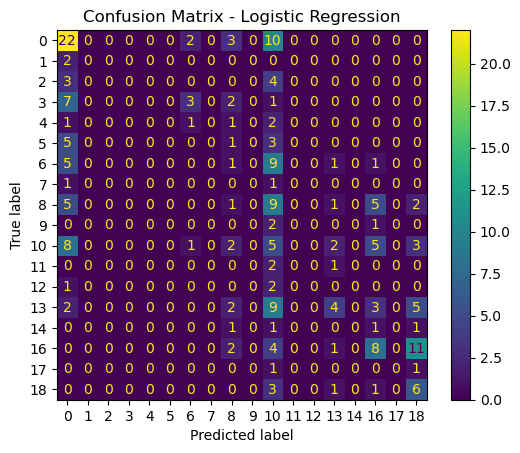

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    model, X_test, y_test
)
plt.title("Confusion Matrix - Logistic Regression")
plt.show()

In [26]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)


In [27]:
model.fit(X_train, y_train)

C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
print("Model Classes:", model.classes_)

Model Classes: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


In [29]:
y_prob = model.predict_proba(X_test)

In [30]:
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=model.classes_)

In [31]:
from sklearn.metrics import roc_auc_score

roc_auc = roc_auc_score(
    y_test_bin,
    y_prob,
    average="macro"
)

print("ROC-AUC Score:", roc_auc)

ROC-AUC Score: nan


C:\Users\NAGESH\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_ranking.py:424: UndefinedMetricWarning: Only one class is present in y_true. ROC AUC score is not defined in that case.
  warnings.warn(


In [32]:
print(y_prob.shape)
print(y_test_bin.shape)

(218, 19)
(218, 19)


In [35]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [None, 5, 10]
}

In [36]:
rf = RandomForestClassifier(random_state=42)
grid = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='accuracy'
)

In [37]:
grid.fit(X_train, y_train)

,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [None, 5, ...], 'n_estimators': [50, 100]}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [38]:
best_rf = grid.best_estimator_

In [39]:
best_pred = best_rf.predict(X_test)

In [40]:
print("Tuned Random Forest Accuracy:",
      accuracy_score(y_test, best_pred))

Tuned Random Forest Accuracy: 0.463302752293578


In [41]:
print("Best Params:", grid.best_params_)
print("Best CV Score:", grid.best_score_)

Best Params: {'max_depth': 10, 'n_estimators': 50}
Best CV Score: 0.49084409685191766


In [42]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
print("RF Accuracy:", rf.score(X_test, y_test))

RF Accuracy: 0.48623853211009177
